In [35]:
import pandas as pd
import numpy as np
import math
import random
import seaborn as snb

In [81]:
seeds=pd.read_csv('seeds.csv')

In [100]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


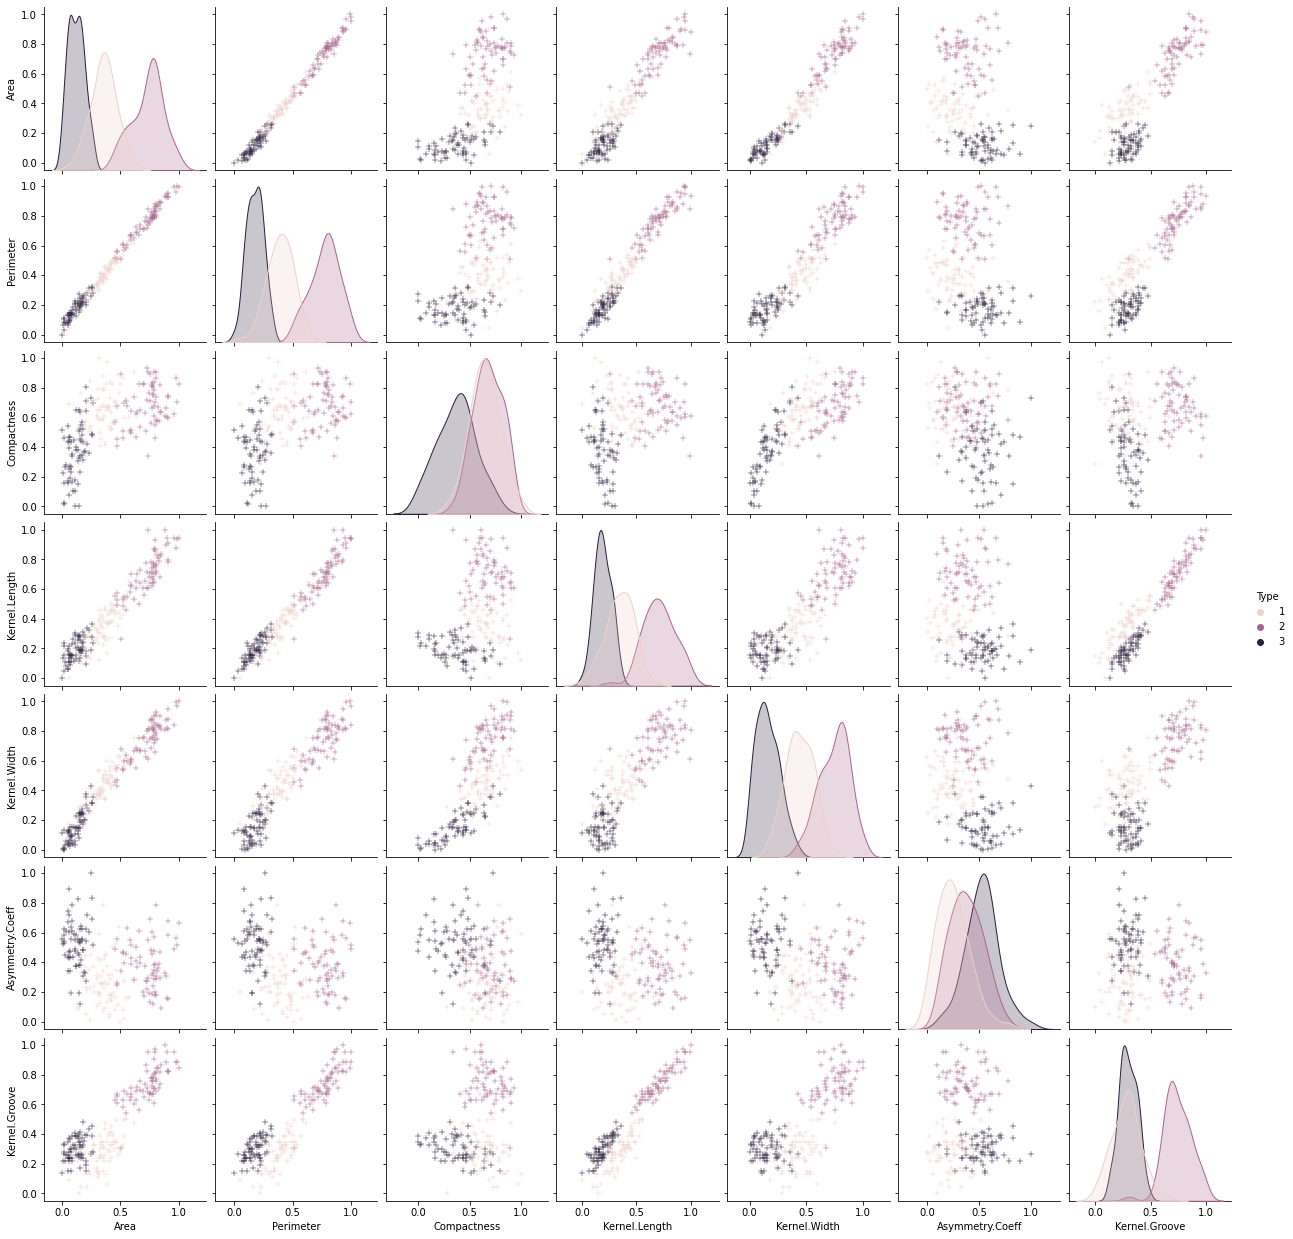

In [101]:
snb.pairplot(seeds,hue="Type",markers='+')

In [82]:
#ZADANIE 1

In [96]:
class zadanie1:
    @staticmethod
    # tasuje dane
    def ShuffleData(df: pd.DataFrame):
        for i in range(len(df)-1,0,-1):
            j=random.randint(0,i)
            df.iloc[i], df.iloc[j] = df.iloc[j], df.iloc[i]
            #zmieniam wartosci dla wylosowanych danych
        return df
    
    @staticmethod
    def NormalizeData(df: pd.DataFrame):
        k = df.drop("Type", axis=1)
        k1 = (k - k.min())/(k.max()-k.min())
        #korzystam ze wzoru na standardyzacje min max
        for (name,col) in k1.iteritems():
            df[name] = col
        return df
    
    @staticmethod
    def SplitData(X,x):
        #dziele na zbior trenignowy i walidacyjny
        if x >= 10 or x < 0:
            raise ValueError('Niepoprawne x (musi być < 1)')
        return X[:math.ceil(len(X)*x)],X[math.ceil(len(X)*(1-x)):]

In [84]:
print("\tseeds database")
print(seeds.head())
shuffle = zadanie1.ShuffleData(seeds)

print("\tshuffled seeds database")
print(shuffle.head())
normalized = zadanie1.NormalizeData(seeds)

print("\t normalized seeds database")
print(normalized.head())

a, b = zadanie1.SplitData(shuffle,0.7)

print("\ndlugosc calego zbioru:",len(shuffle))
print("dlugosc treningowy:",len(a))
print("dlugosc walidacyjny:",len(b))

	seeds database
    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  
	shuffled seeds database
    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  14.99      14.56       0.8883          5.570         3.377   
1  18.95      16.42       0.8829          6.248         3.755   
2  11.34      12.87       0.8596          5.053         2.849   
3  12.19      13.20       0.8783          5.137         

In [85]:
#ZADANIE 2

In [99]:
class NaiveBayes:
    @staticmethod
    # licze srednia
    def mean(attr):
        try:
            return sum(attr)/len(attr)
        except TypeError:
            print(attr)
            return sum(attr)/len(attr)
    #odchylenie standardowe ze wzoru na std
    def std(attr):
        mean = NaiveBayes.mean(attr)
        sumelem = 0
        for i in attr:
            sumelem += (i-mean)**2
        return math.sqrt(sumelem/len(attr))

    @staticmethod
    def gauss(x, mean, std):
        #daje ify na potrzebe sprawdzania z jakiego wzoru skorzystac
        if x<mean-math.sqrt(6)*std or x>mean+math.sqrt(6)*std:
            x=0
        elif x>=mean-math.sqrt(6)*std or x<=mean:
            x=((x-mean)/(6*std**2))+(1/(math.sqrt(6)*std))
        elif x>mean or x<=mean+math.sqrt(6)*std:
            x=(-(x-mean)/(6*std**2))+(1/(math.sqrt(6)*std))
        
        return x
    #klasyfikuje zbiory ze wzgledu na wybrane dane i zbior trenigowy
    def classify(train,sample):
        names = train.Type.unique()
        classes = []
        for name in names:
            classes += [train[train['Type'] == name]]
            del classes[-1]['Type']
        #klasyfikuje rezultaty ze wzgledu na przynaleznosc do wzoru
        classes_gauss = []
        for classy in classes:
            attrs_mean = []
            attrs_std = []
            attrs_gauss = []
            for (name, data) in classy.iteritems():
                attrs_mean += [NaiveBayes.mean(data.values)]
                attrs_std += [NaiveBayes.std(data.values)]
                attrs_gauss += [NaiveBayes.gauss(sample[name],attrs_mean[-1],attrs_std[-1])]
            classes_gauss += [math.prod(attrs_gauss)]

        return names[classes_gauss.index(max(classes_gauss))]

In [105]:
seedsmixed = zadanie1.ShuffleData(seeds)
seedtrain, seedvalid = zadanie1.SplitData(seedsmixed,0.7)
correct = 0
for i in range(0,len(seedvalid)):
    sample = seedvalid.iloc[i].drop('Type').to_dict()
    if seedvalid.iloc[i].Type == NaiveBayes.classify(seedtrain,sample):
        correct += 1
accuracy = correct/len(seedvalid.index)*100
print("Dokladnosc (nieznormalizawana) -",accuracy,"%")

Dokladnosc (nieznormalizawana) - 90.64748201438849 %


In [106]:
norm = zadanie1.ShuffleData(normalized)
seedtrain, seedvalid = zadanie1.SplitData(norm,0.7)
correct = 0
for i in range(0,len(seedvalid)):
    sample = seedvalid.iloc[i].drop('Type').to_dict()
    if seedvalid.iloc[i].Type == NaiveBayes.classify(seedtrain,sample):
        correct += 1
accuracy = correct/len(seedvalid.index)*100
print("Dokladnosc (znormalizowana) -",accuracy,"%")

Dokladnosc (znormalizowana) - 91.36690647482014 %


In [89]:
#ZADANIE 3

In [90]:
class SoftSet:
    @staticmethod
    #klasyfikacja sampla wraz z podaniem z jakiej bazy korzystam
    def classify(sample, X, Y):
        results = []
        for i in range(0,len(X)):
            results += [0]
            for key in sample:
                results[i] += sample[key]*Y[i][key]
        ret = []
        max_res = max(results)
        for i in range(0,len(X)):
            if results[i] == max_res:
                ret += [X[i]]
        return ret

In [107]:
seeds = zadanie1.ShuffleData(seeds)
seedtrain, seedvalid = zadanie1.SplitData(seeds,0.7)
X = []
Y = []
global_avgs = {}

for (column_name, column_data) in seedtrain.iteritems():
    if column_name == "Type":
        continue
    global_avgs[column_name] = sum(column_data)/len(column_data)
for name in seedtrain["Type"].unique():
    X += [name]
    frame = seedtrain[seedtrain["Type"] == name]
    frame.pop("Type")
    y = {}
    for (column_name, column_data) in frame.iteritems():
        avg = sum(column_data)/len(column_data)
        y[column_name] = 1 if avg >= global_avgs[column_name] else 0
    Y += [y]
    
correct = 0
for i in range(0,len(seedvalid)):
    sample = seedvalid.iloc[i].drop('Type').to_dict()
    if seedvalid.iloc[i].Type in SoftSet.classify(sample,X,Y):
        correct += 1
accuracy = correct/len(seedvalid.index)*100
print(f"Dokladnosc klasyfikatora miekkiego: {accuracy}% => {correct}/{len(seedvalid)}")

Dokladnosc klasyfikatora miekkiego: 37.410071942446045% => 52/139


In [92]:
#ZADANIE 4

In [112]:
class algorytmK:
    def __init__(self, k):
        self.k = k
        
    def fit(self, df):
        self.df = df
    
    # korzystam ze wzoru w celu ustalenia L(x,y)
    @staticmethod
    def dist(x,y):
        return sum([(abs(xi-yi))
                    for xi,yi in zip(x,y)])
    
    #spradzam, czy dany wynik pasuje do porządanego wyniku
    def predict(self, point):
        types = {}
        for v in pd.unique(self.df["Type"]):
            types[v] = 0
        result = []
        for sample in self.df.values:
            result.append([algorytmK.dist(sample[:-1], point), sample[-1]])
        result.sort(key=lambda x:x[0])
        for i in range(self.k):
            types[result[i][1]] += 1
        return max(types, key=types.get)
    
    #licze ile jest trafionych dobrze wynikow
    def score(self, test_X):
        correct = 0
        incorrect = 0
        for sample in test_X.values:
            if (x:=self.predict(sample)) == sample[-1]:
                correct += 1
            else:
                incorrect+=1
        all=correct+incorrect
        return correct/(all)*100

In [114]:
X_train, X_test = zadanie1.SplitData(seeds, 0.7)
algK = algorytmK(4)
algK.fit(X_train)
print(f"Dokladnosc dla nieznormalizowanego zbioru: {algK.score(X_test)} %")

normseeds = zadanie1.NormalizeData(seeds)
normTrain, normTest = zadanie1.SplitData(normseeds,0.7)
algK.fit(normTrain)
print(f"Dokladnosc dla znormalizowanego zbioru: {algK.score(normTrain)} %")

Dokladnosc dla nieznormalizowanego zbioru: 94.96402877697841 %
Dokladnosc dla znormalizowanego zbioru: 94.28571428571428 %
